In [1]:
MERCHAINDISE = 'LTCUSDT'
DAYS = 30
START_DATE = '2021-9-7'
END_DATE = '2021-9-28'
    

### BOOKMARK

Go to <a href=#bookmark1>1 hour</a>

In [2]:
# Private function

def report_by_hour(hour): 
    hour_observe = hour
    data_prices_str = f"data_prices_{hour_observe}"
    type_continuous_str = f"type_continuous_{hour_observe}"

    data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
    data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

    print(f"Giờ {hour_observe}")
    print("________________________________")
    print(data_prices_up['hour_return'].describe())
    print(data_prices_up['hour_return'].sum())


    print("+++")
    print(data_prices_down['hour_return'].describe())
    print(data_prices_down['hour_return'].sum())

    data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


    print('____________________________________________________________')

    data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]

    data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

    type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

    labels = type_continuous_group.index.values
    sizes = type_continuous_group.values

    plt.figure()
    fig1, ax1 = plt.subplots(figsize=(12, 7))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.legend()
    plt.show()

    print(type_continuous_group)

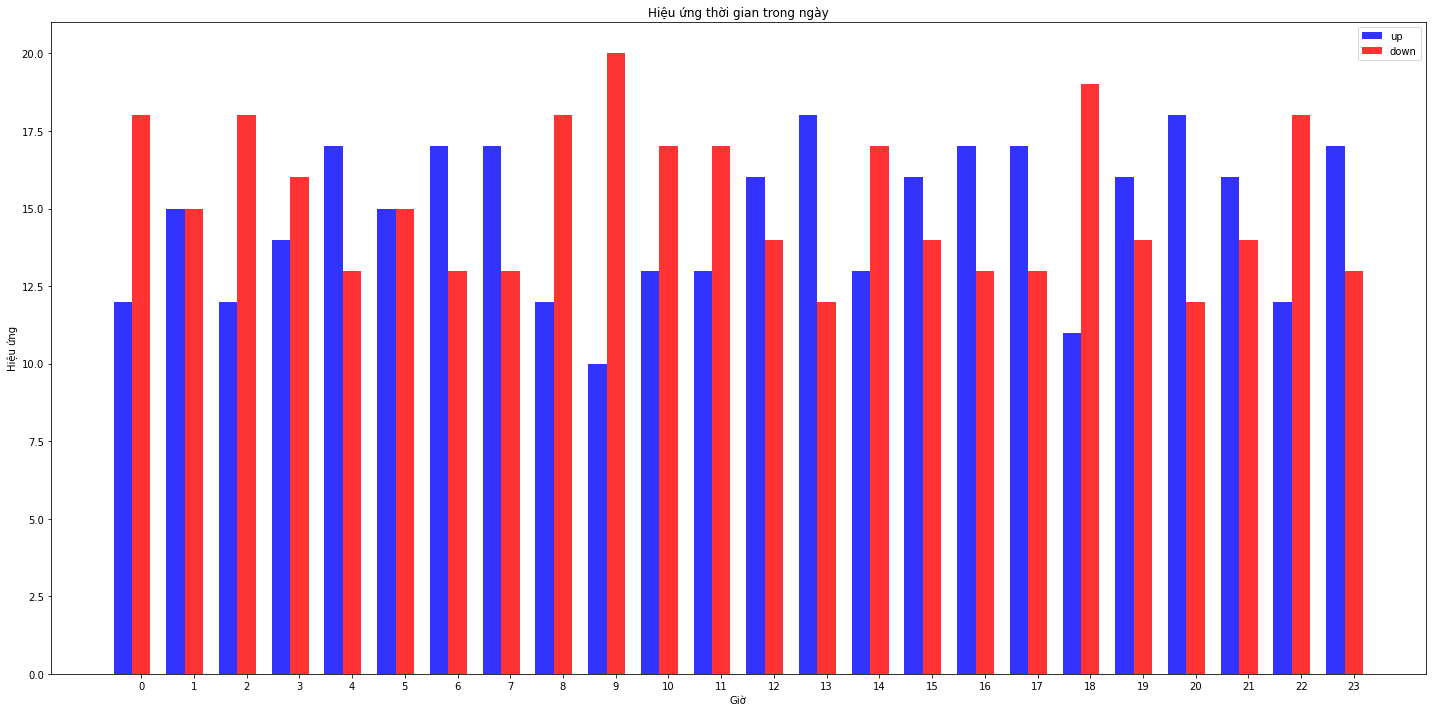

______________________________Hour return____________________________
________________________________
count    354.000000
mean       0.867714
std        0.978809
min        0.000000
25%        0.251794
50%        0.572109
75%        1.097836
max        6.996047
Name: hour_return, dtype: float64
307.1705997321121
+++
count    366.000000
mean      -0.812728
std        0.804714
min       -6.947070
25%       -1.040923
50%       -0.602193
75%       -0.301890
max       -0.039108
Name: hour_return, dtype: float64
-297.45840020762387
______________________________Loại tiếp diễn____________________________


<Figure size 720x720 with 0 Axes>

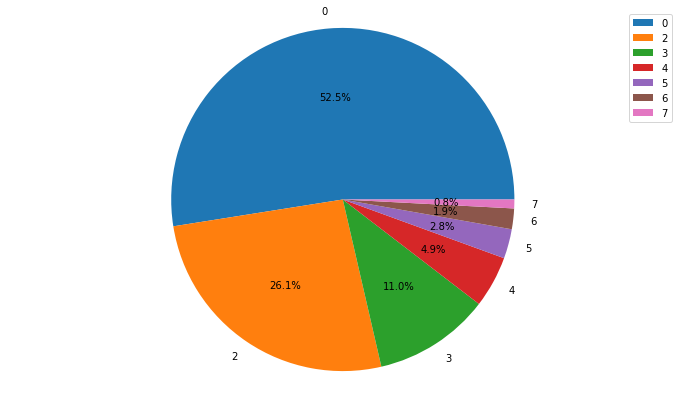

type_continuous
0    378
2    188
3     79
4     35
5     20
6     14
7      6
dtype: int64
______________________________Thời gian biến động nhất____________________________


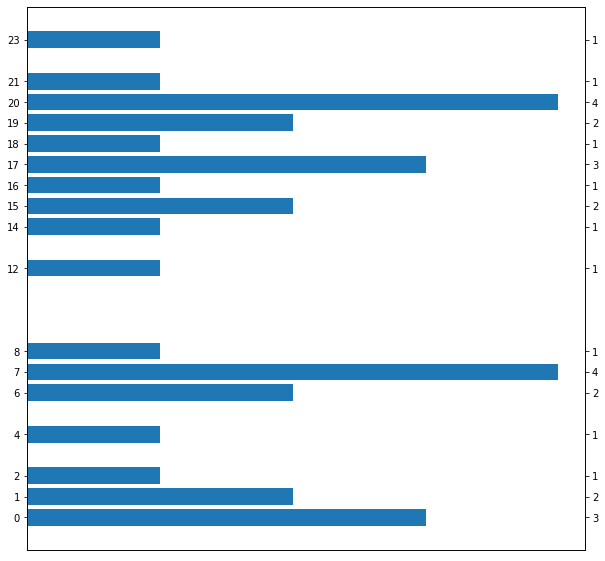

In [3]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous, until_now_type, candlestick_type_by_hour
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug(MERCHAINDISE)
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*DAYS, "DESC")
# candlestick = Candlestick(merchandise_rate_id, 'hour', 24*50, "DESC", start_date='2021-9-7', end_date='2021-9-28')

data_prices = candlestick.to_df()


# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['hour_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)
data_prices['type_continuous'] = type_continuous(data_prices)

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()


for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]

    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)


plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='up')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='down')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple(np.arange(24)))
plt.legend()
plt.tight_layout()
plt.show()


data_prices_up = data_prices[data_prices['type'] == 'up']
data_prices_down = data_prices[data_prices['type'] == 'down']

print("______________________________Hour return____________________________")

print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())


print("______________________________Loại tiếp diễn____________________________")

type_continuous_group = data_prices.groupby(['type_continuous']).size()


labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)


print("______________________________Thời gian biến động nhất____________________________")


def highest_in_day(x):
    max = data_prices[data_prices.day == x.day].hour_return.max()
    return data_prices[(data_prices.day == x.day) & (data_prices.hour_return == max)].hour.iat[0]


data_prices['highest_in_day'] = data_prices[[
    'day']].apply(lambda x: highest_in_day(x), axis=1)

highest_in_day_group = data_prices.groupby(
    'day').mean().groupby('highest_in_day').count()


list_hours = [int(hour) for hour in highest_in_day_group.index.values.tolist()]
list_highest_in_day = highest_in_day_group['hour'].tolist()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_highest_in_day, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_highest_in_day)

plt.show()


Giờ 1
________________________________
count    15.000000
mean      1.003772
std       1.366156
min       0.000000
25%       0.230173
50%       0.336862
75%       1.276970
max       4.958295
Name: hour_return, dtype: float64
15.05657702041619
+++
count    15.000000
mean     -0.695680
std       0.488113
min      -1.477651
25%      -1.109006
50%      -0.527903
75%      -0.269700
max      -0.087951
Name: hour_return, dtype: float64
-10.435193615250332
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


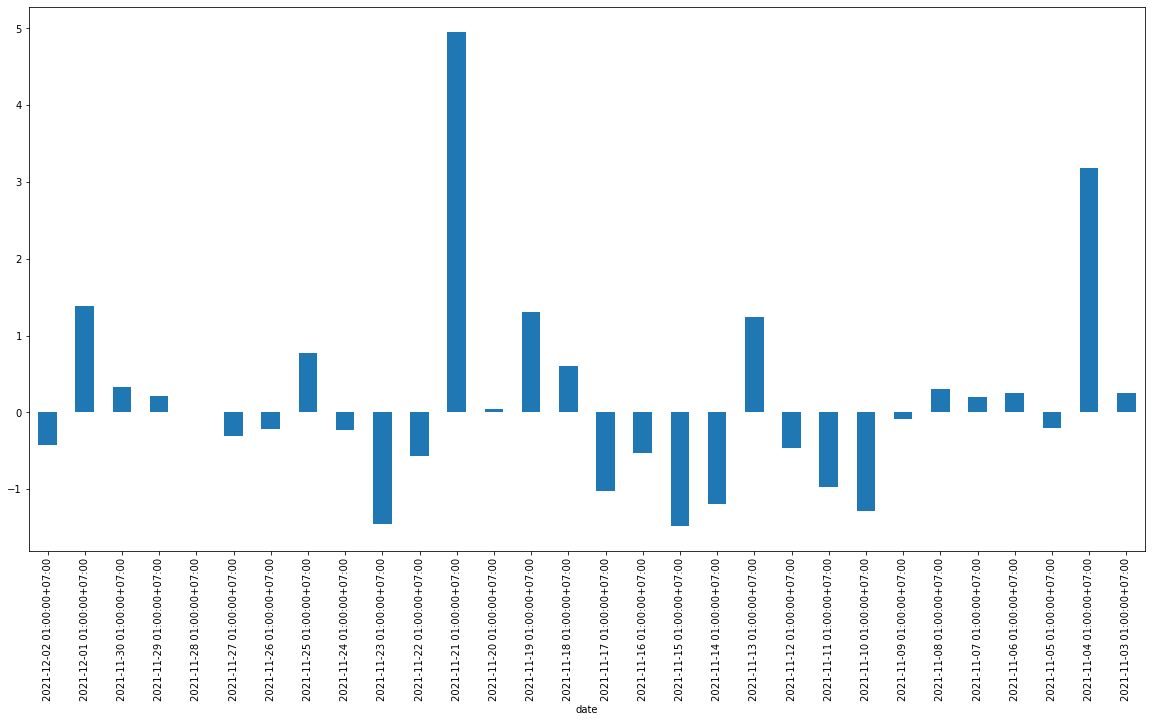

<Figure size 720x720 with 0 Axes>

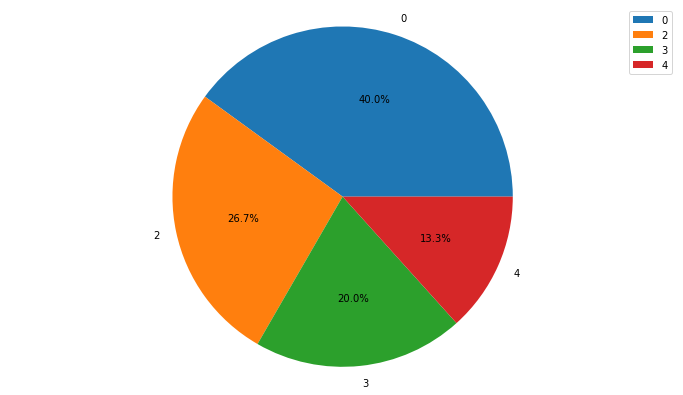

type_continuous_1
0    12
2     8
3     6
4     4
dtype: int64


In [4]:
hour_observe = 1
data_price_1 = data_prices[(data_prices['hour'] == hour_observe)]
report_by_hour(hour_observe)


Left off here <a name='bookmark1'> test </a>

Giờ 2
________________________________
count    12.000000
mean      0.886117
std       0.474977
min       0.000000
25%       0.599924
50%       0.936287
75%       1.086628
max       1.687922
Name: hour_return, dtype: float64
10.633400372951463
+++
count    18.000000
mean     -0.715407
std       0.573950
min      -2.072357
25%      -0.926482
50%      -0.548344
75%      -0.325355
max      -0.094742
Name: hour_return, dtype: float64
-12.877317547680638
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


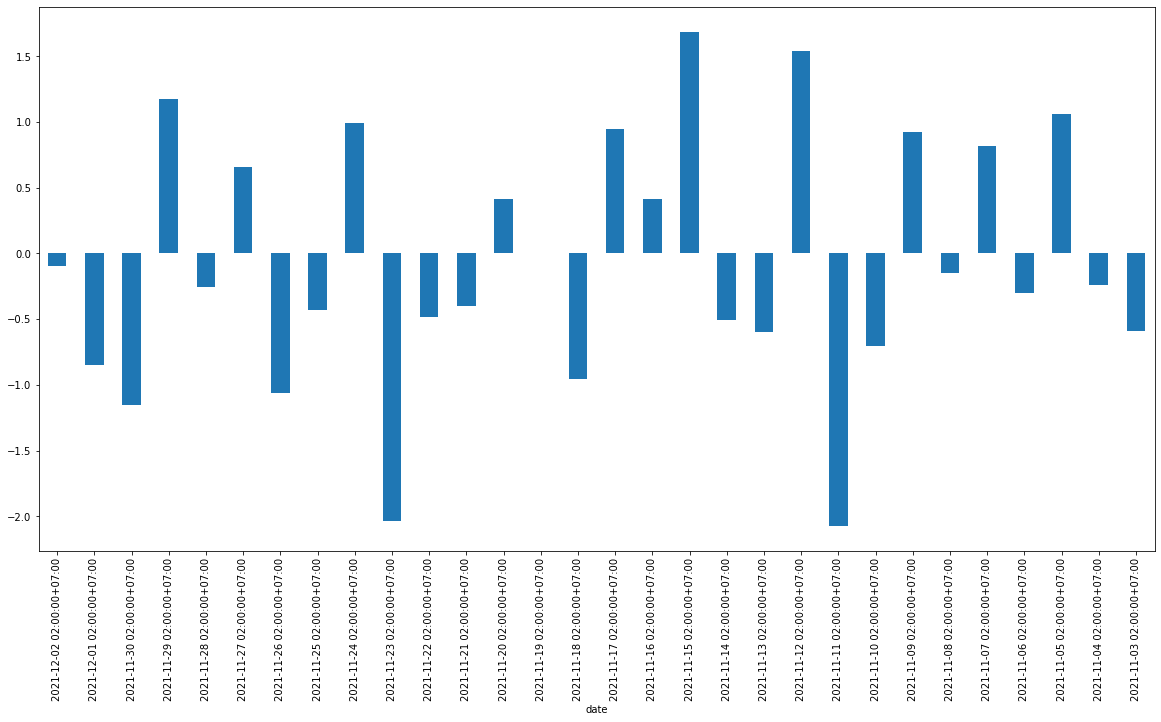

<Figure size 720x720 with 0 Axes>

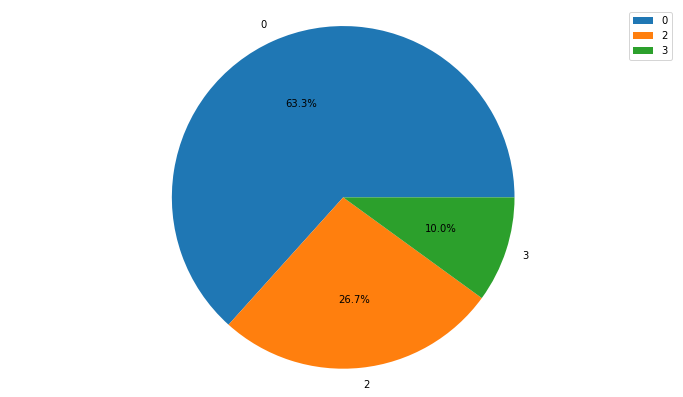

type_continuous_2
0    19
2     8
3     3
dtype: int64


In [5]:
hour_observe = 2

data_price_2 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 3
________________________________
count    14.000000
mean      0.586833
std       0.350416
min       0.000000
25%       0.367066
50%       0.543094
75%       0.833078
max       1.203659
Name: hour_return, dtype: float64
8.215668235481106
+++
count    16.000000
mean     -0.944295
std       0.710859
min      -2.263990
25%      -1.370087
50%      -0.779143
75%      -0.453531
max      -0.044326
Name: hour_return, dtype: float64
-15.108718496510042
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


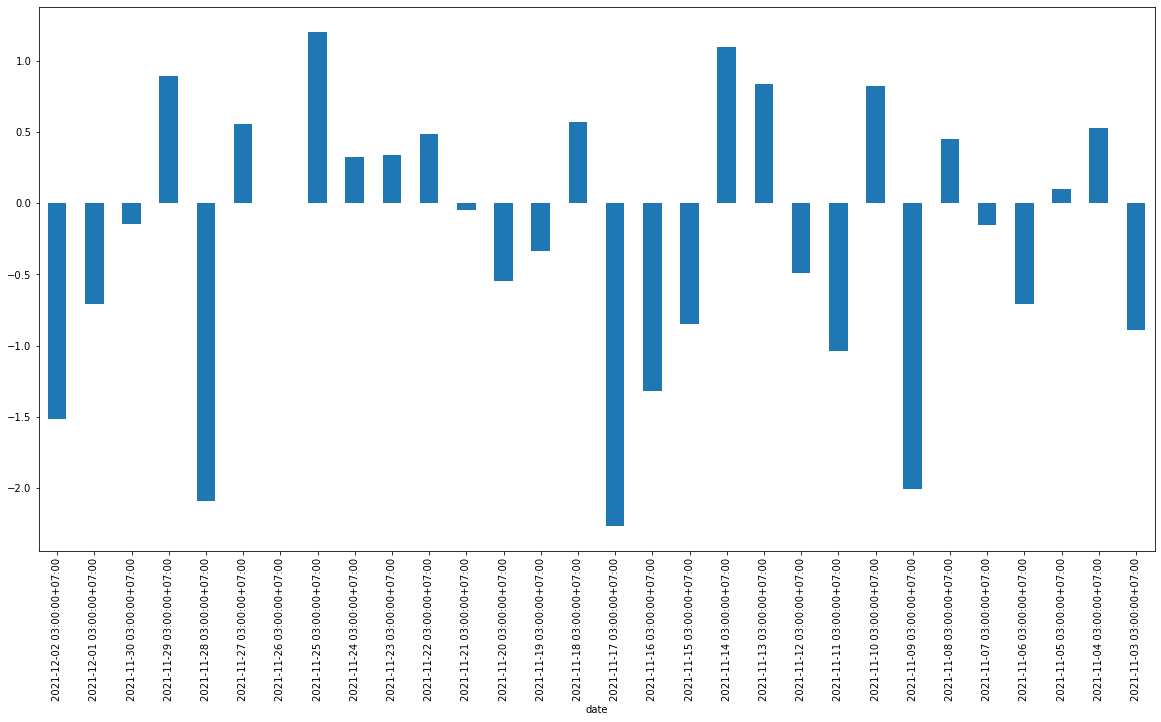

<Figure size 720x720 with 0 Axes>

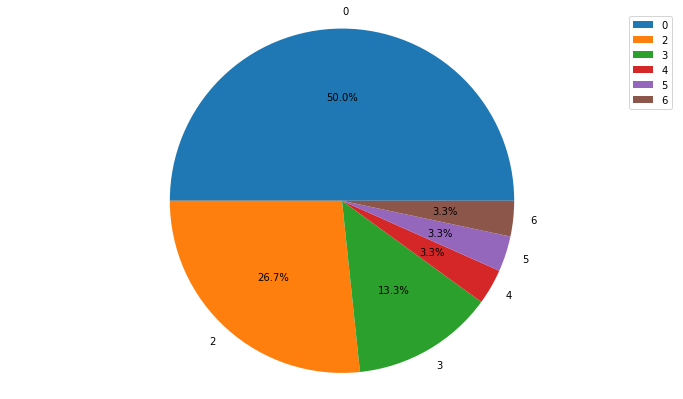

type_continuous_3
0    15
2     8
3     4
4     1
5     1
6     1
dtype: int64


In [6]:
hour_observe = 3

data_price_3 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 4
________________________________
count    17.000000
mean      0.755483
std       0.805834
min       0.000000
25%       0.248880
50%       0.609137
75%       0.780031
max       3.131524
Name: hour_return, dtype: float64
12.84321480999998
+++
count    13.000000
mean     -0.992418
std       1.750803
min      -6.632838
25%      -0.805730
50%      -0.387147
75%      -0.239923
max      -0.046019
Name: hour_return, dtype: float64
-12.9014345409724
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


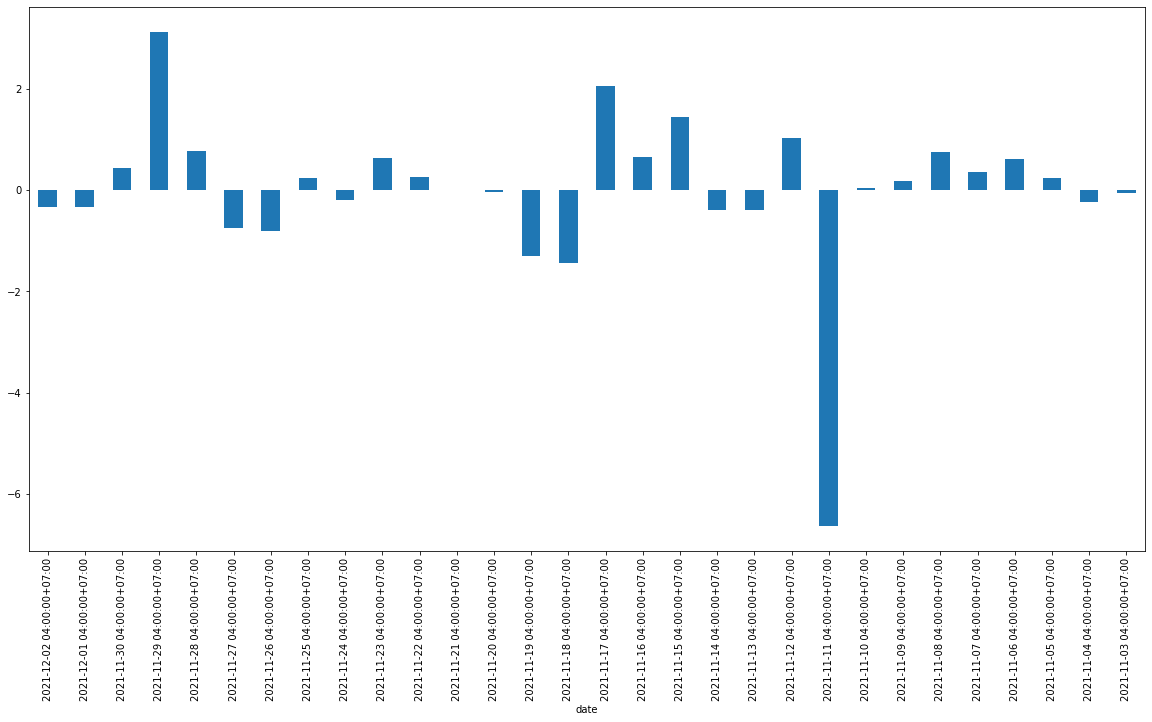

<Figure size 720x720 with 0 Axes>

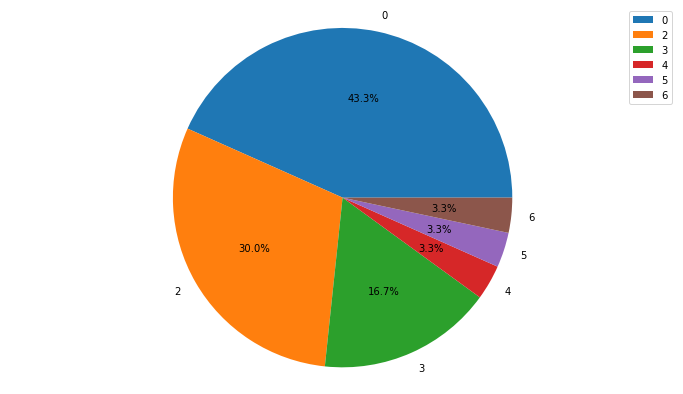

type_continuous_4
0    13
2     9
3     5
4     1
5     1
6     1
dtype: int64


In [7]:
hour_observe = 4

data_price_4 = data_prices[(data_prices['hour'] == hour_observe)]


report_by_hour(hour_observe)

Giờ 5
________________________________
count    15.000000
mean      0.599060
std       0.353967
min       0.095602
25%       0.450368
50%       0.608134
75%       0.719231
max       1.390887
Name: hour_return, dtype: float64
8.985903265371928
+++
count    15.000000
mean     -0.542891
std       0.483644
min      -1.670040
25%      -0.871435
50%      -0.356860
75%      -0.210065
max      -0.042845
Name: hour_return, dtype: float64
-8.143366964737696
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


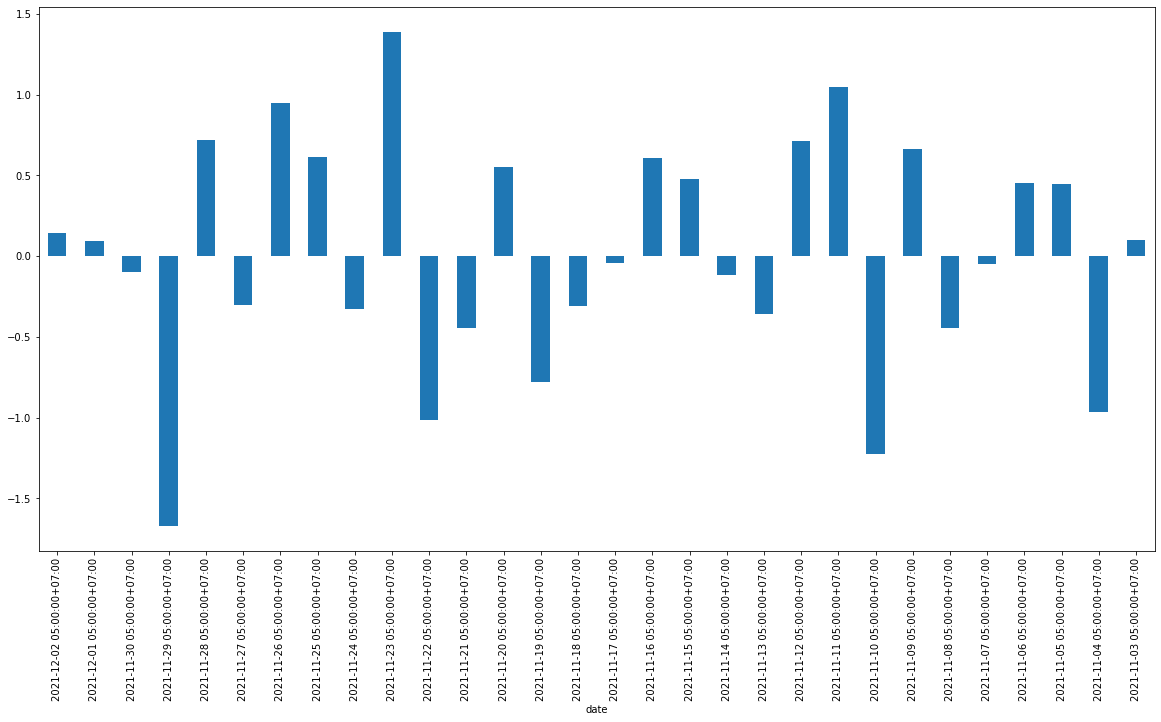

<Figure size 720x720 with 0 Axes>

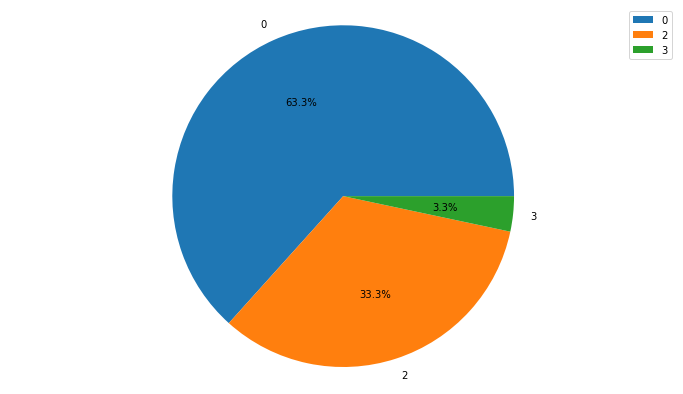

type_continuous_5
0    19
2    10
3     1
dtype: int64


In [8]:
hour_observe = 5

data_price_5 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 6
________________________________
count    17.000000
mean      0.746405
std       0.738121
min       0.000000
25%       0.253678
50%       0.597610
75%       1.069519
max       2.623457
Name: hour_return, dtype: float64
12.68887759646503
+++
count    13.000000
mean     -0.816943
std       0.588053
min      -1.797080
25%      -1.328761
50%      -0.760649
75%      -0.313059
max      -0.100452
Name: hour_return, dtype: float64
-10.62025717638459
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


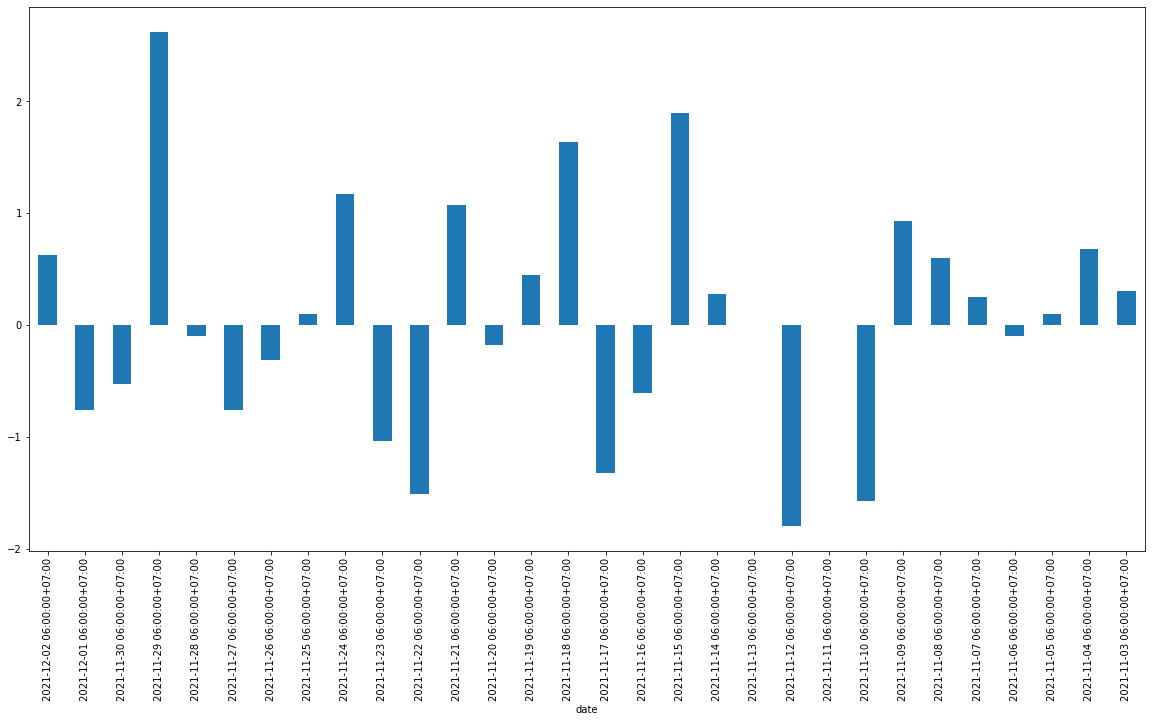

<Figure size 720x720 with 0 Axes>

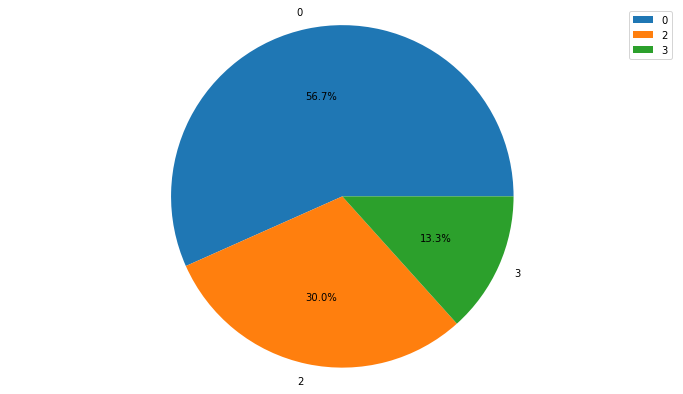

type_continuous_6
0    17
2     9
3     4
dtype: int64


In [9]:
hour_observe = 6

data_price_6 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 7
________________________________
count    17.000000
mean      1.189713
std       0.923021
min       0.045893
25%       0.651629
50%       0.961538
75%       1.583375
max       3.711790
Name: hour_return, dtype: float64
20.225117392026824
+++
count    13.000000
mean     -1.142687
std       1.016320
min      -3.992395
25%      -1.278660
50%      -0.868307
75%      -0.410256
max      -0.194647
Name: hour_return, dtype: float64
-14.854930132906816
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


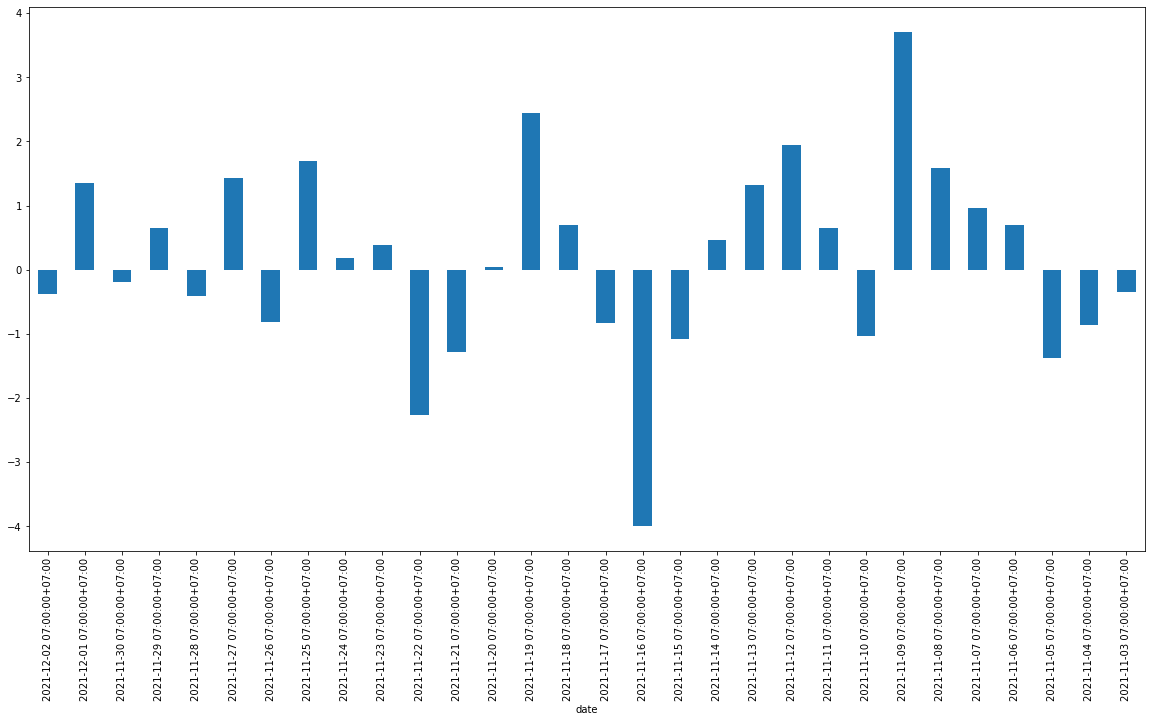

<Figure size 720x720 with 0 Axes>

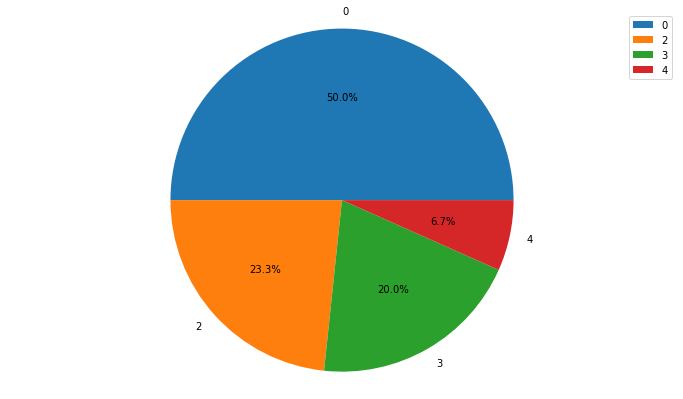

type_continuous_7
0    15
2     7
3     6
4     2
dtype: int64


In [10]:
hour_observe = 7

data_price_7 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 8
________________________________
count    12.000000
mean      0.966082
std       0.927237
min       0.099850
25%       0.232396
50%       0.639236
75%       1.485035
max       2.729993
Name: hour_return, dtype: float64
11.592980082583631
+++
count    18.000000
mean     -0.786412
std       0.753557
min      -2.594340
25%      -1.055089
50%      -0.565309
75%      -0.317378
max      -0.045208
Name: hour_return, dtype: float64
-14.155410209114333
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


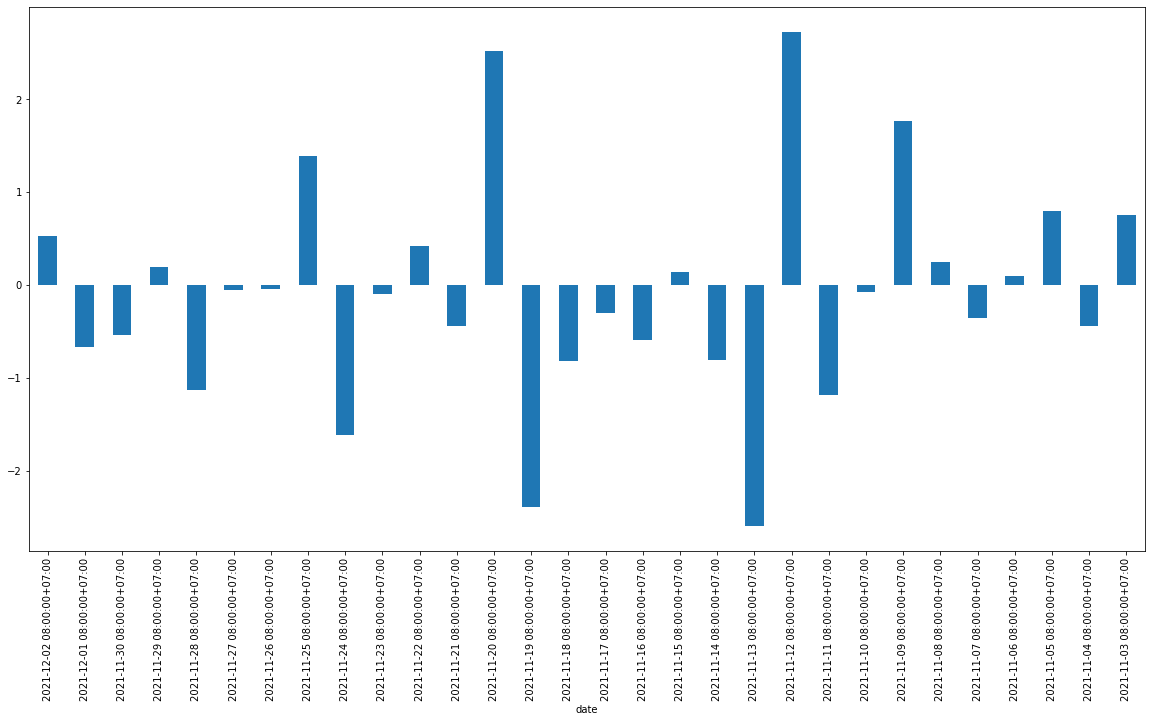

<Figure size 720x720 with 0 Axes>

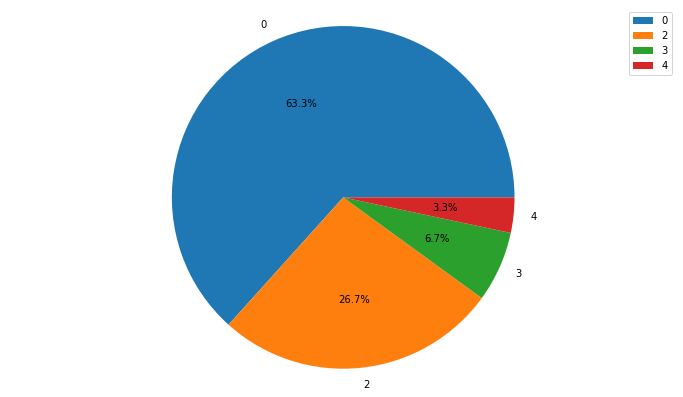

type_continuous_8
0    19
2     8
3     2
4     1
dtype: int64


In [11]:
hour_observe = 8

data_price_8 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 9
________________________________
count    10.000000
mean      0.566989
std       0.354277
min       0.000000
25%       0.290741
50%       0.679904
75%       0.750019
max       1.128504
Name: hour_return, dtype: float64
5.669886842176464
+++
count    20.000000
mean     -0.744582
std       0.525204
min      -1.874003
25%      -1.107906
50%      -0.570315
75%      -0.357560
max      -0.131637
Name: hour_return, dtype: float64
-14.891641834912148
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


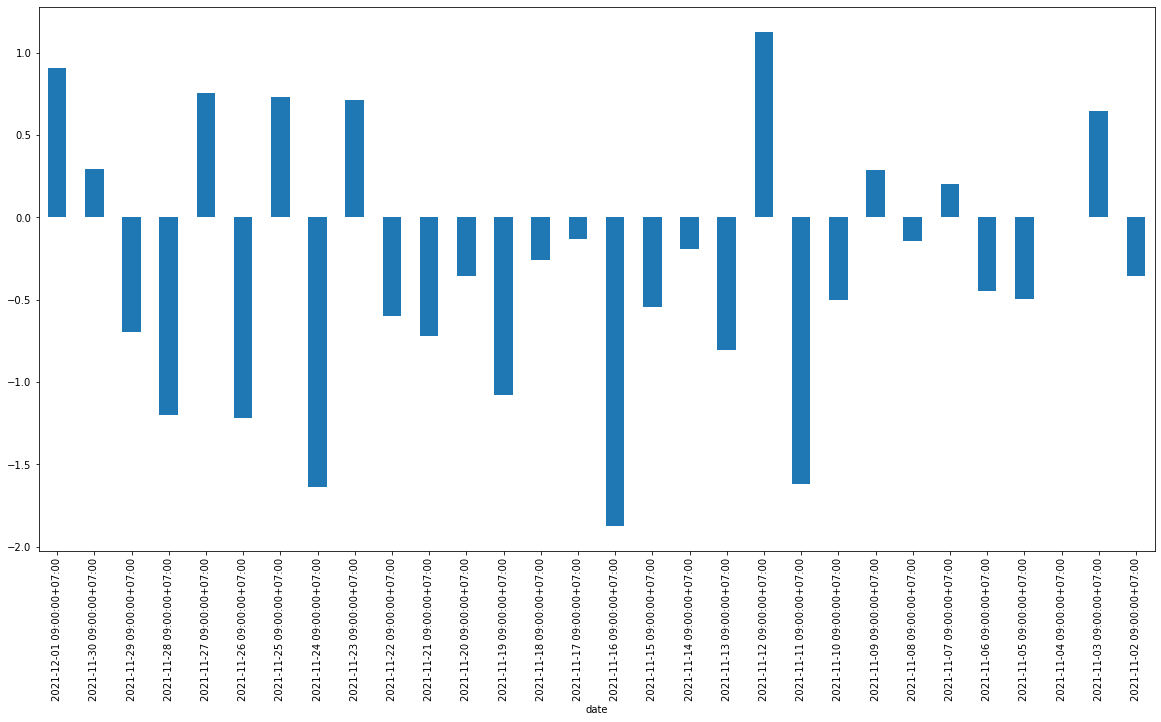

<Figure size 720x720 with 0 Axes>

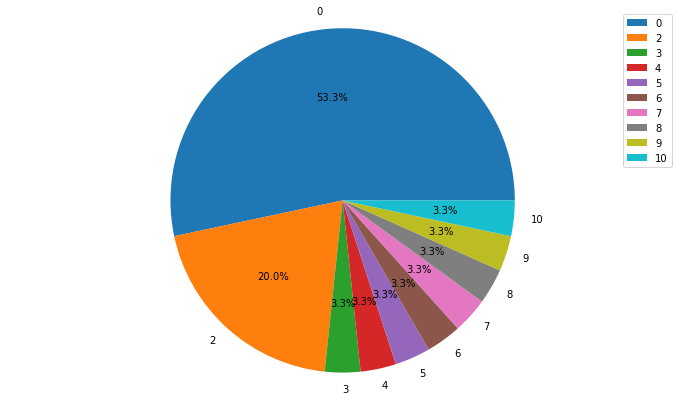

type_continuous_9
0     16
2      6
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
dtype: int64


In [12]:
hour_observe = 9

data_price_9 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 10
________________________________
count    13.000000
mean      0.495481
std       0.580452
min       0.000000
25%       0.097276
50%       0.299401
75%       0.663193
max       2.020619
Name: hour_return, dtype: float64
6.441258405592481
+++
count    17.000000
mean     -0.799203
std       0.737466
min      -3.146853
25%      -0.837851
50%      -0.650142
75%      -0.273011
max      -0.236742
Name: hour_return, dtype: float64
-13.586444176731675
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


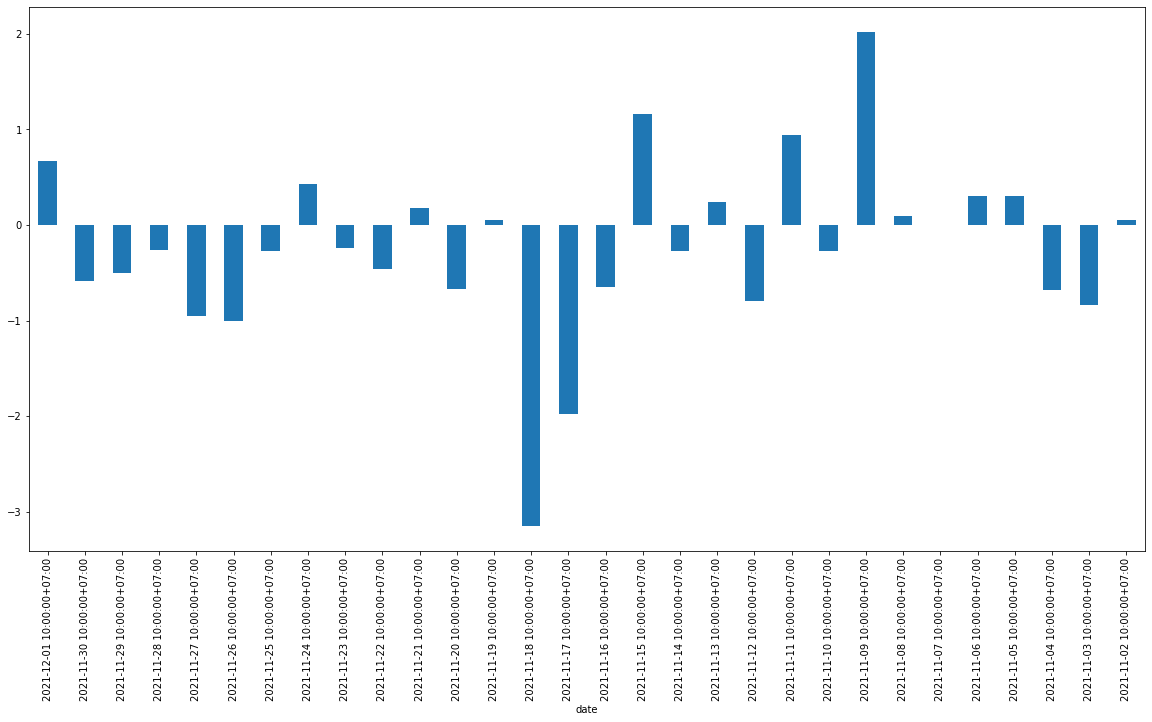

<Figure size 720x720 with 0 Axes>

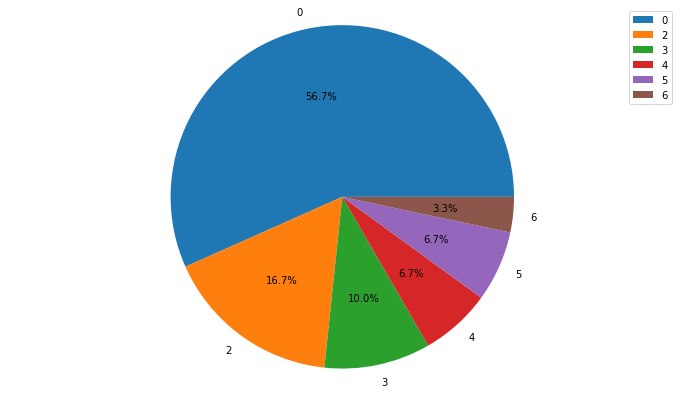

type_continuous_10
0    17
2     5
3     3
4     2
5     2
6     1
dtype: int64


In [13]:
hour_observe = 10

data_price_10 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 11
________________________________
count    13.000000
mean      0.840819
std       1.038077
min       0.089646
25%       0.323924
50%       0.353714
75%       0.858896
max       3.614458
Name: hour_return, dtype: float64
10.930644285379632
+++
count    17.000000
mean     -0.562863
std       0.480094
min      -1.738076
25%      -0.658514
50%      -0.528541
75%      -0.181357
max      -0.039108
Name: hour_return, dtype: float64
-9.568672021874548
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


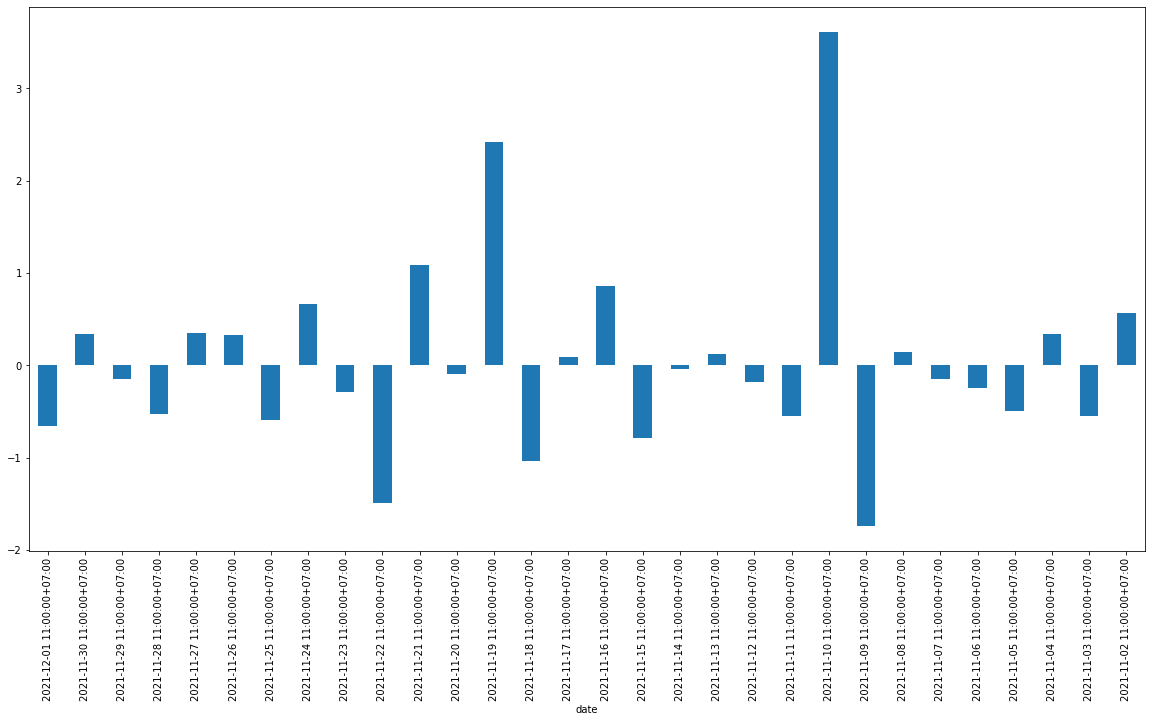

<Figure size 720x720 with 0 Axes>

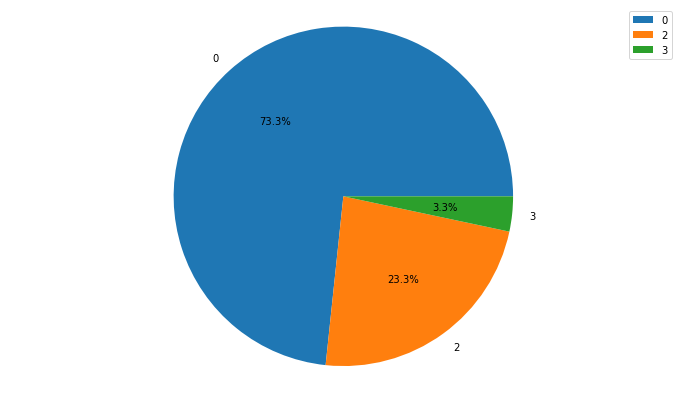

type_continuous_11
0    22
2     7
3     1
dtype: int64


In [14]:
hour_observe = 11

data_price_11 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 12
________________________________
count    16.000000
mean      0.698861
std       0.534835
min       0.047148
25%       0.309469
50%       0.610424
75%       0.942861
max       2.047952
Name: hour_return, dtype: float64
11.181782497683628
+++
count    14.000000
mean     -0.841616
std       0.651205
min      -2.057815
25%      -1.291801
50%      -0.699024
75%      -0.447280
max      -0.040486
Name: hour_return, dtype: float64
-11.782624428196922
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


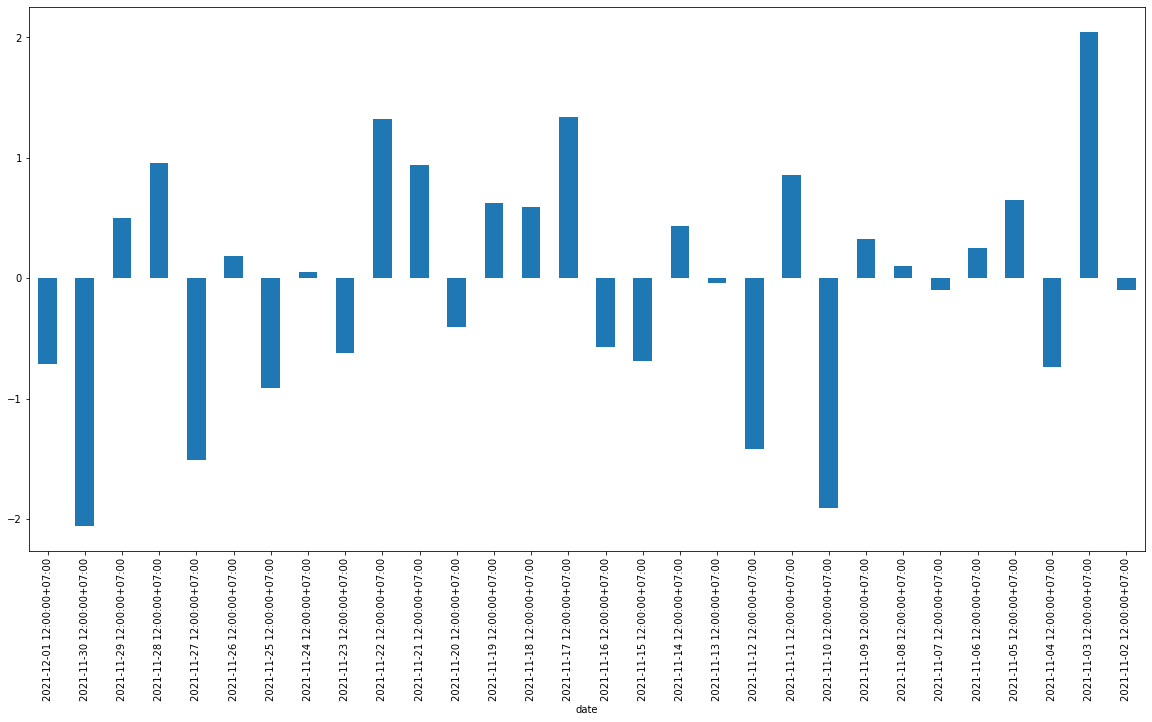

<Figure size 720x720 with 0 Axes>

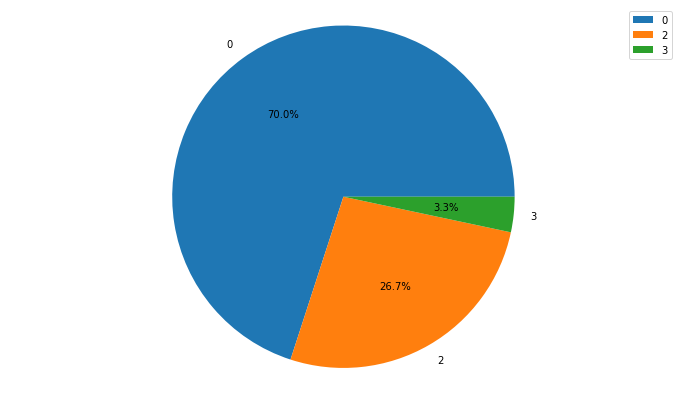

type_continuous_12
0    21
2     8
3     1
dtype: int64


In [15]:
hour_observe = 12

data_price_12 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 13
________________________________
count    18.000000
mean      0.812280
std       0.770542
min       0.135870
25%       0.267872
50%       0.671960
75%       0.937198
max       3.286206
Name: hour_return, dtype: float64
14.621045698356609
+++
count    12.000000
mean     -0.326593
std       0.227982
min      -0.720461
25%      -0.466508
50%      -0.292695
75%      -0.099989
max      -0.082034
Name: hour_return, dtype: float64
-3.919110950464675
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


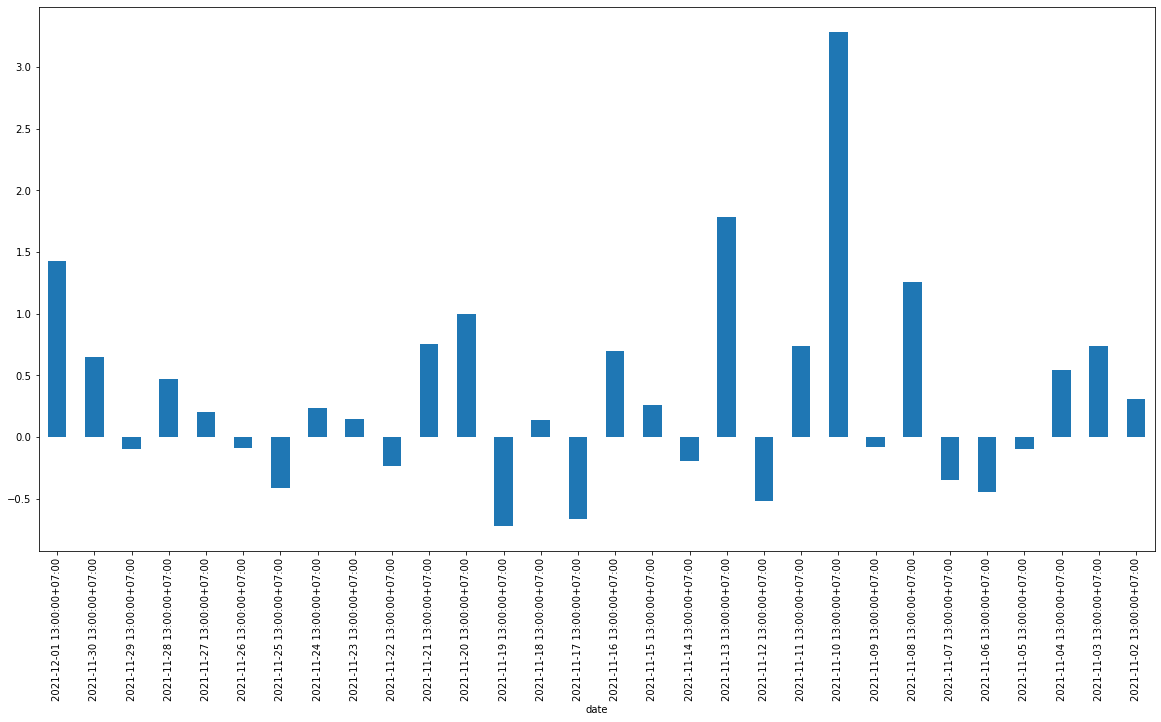

<Figure size 720x720 with 0 Axes>

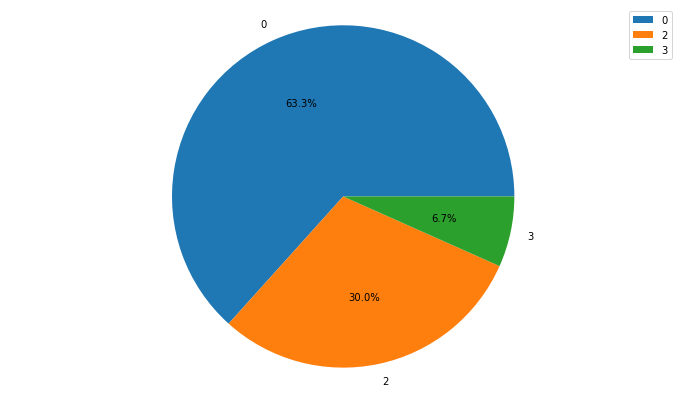

type_continuous_13
0    19
2     9
3     2
dtype: int64


In [16]:
hour_observe = 13

data_price_13 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 14
________________________________
count    13.000000
mean      0.715057
std       0.694517
min       0.000000
25%       0.185254
50%       0.282220
75%       1.268201
max       2.117013
Name: hour_return, dtype: float64
9.295738532367197
+++
count    17.000000
mean     -0.770231
std       0.654876
min      -2.489627
25%      -1.054945
50%      -0.456389
75%      -0.314607
max      -0.040535
Name: hour_return, dtype: float64
-13.093920887230071
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


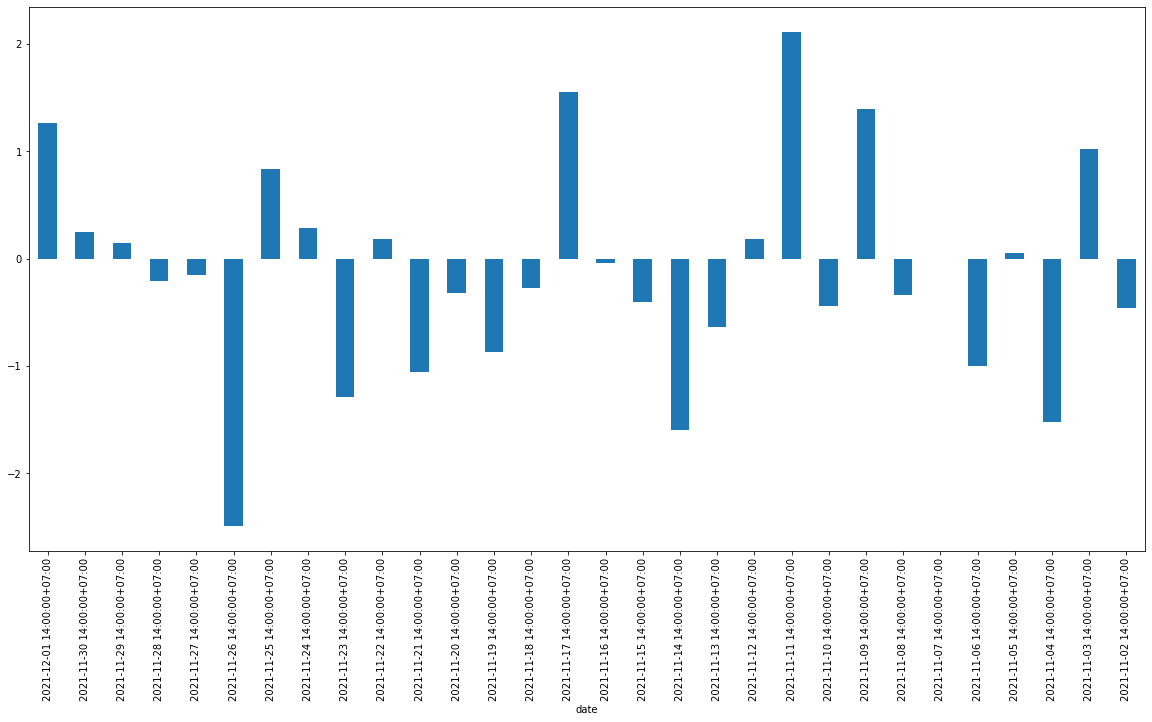

<Figure size 720x720 with 0 Axes>

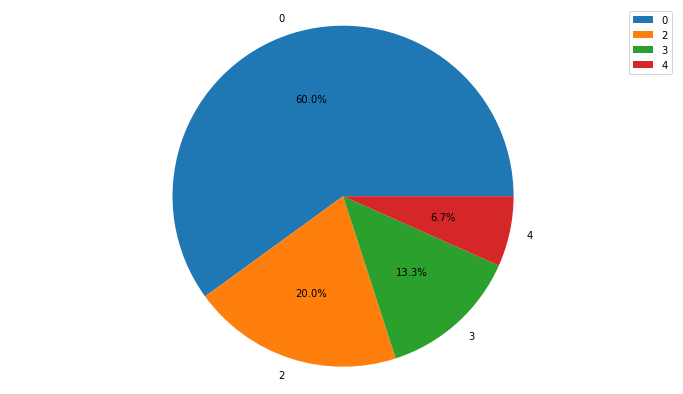

type_continuous_14
0    18
2     6
3     4
4     2
dtype: int64


In [17]:
hour_observe = 14

data_price_14 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 15
________________________________
count    16.000000
mean      0.721774
std       1.058526
min       0.000000
25%       0.187844
50%       0.289421
75%       0.511207
max       3.512195
Name: hour_return, dtype: float64
11.548387764717411
+++
count    14.000000
mean     -1.098770
std       1.726614
min      -6.947070
25%      -1.034995
50%      -0.708193
75%      -0.331566
max      -0.050684
Name: hour_return, dtype: float64
-15.38278678588075
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


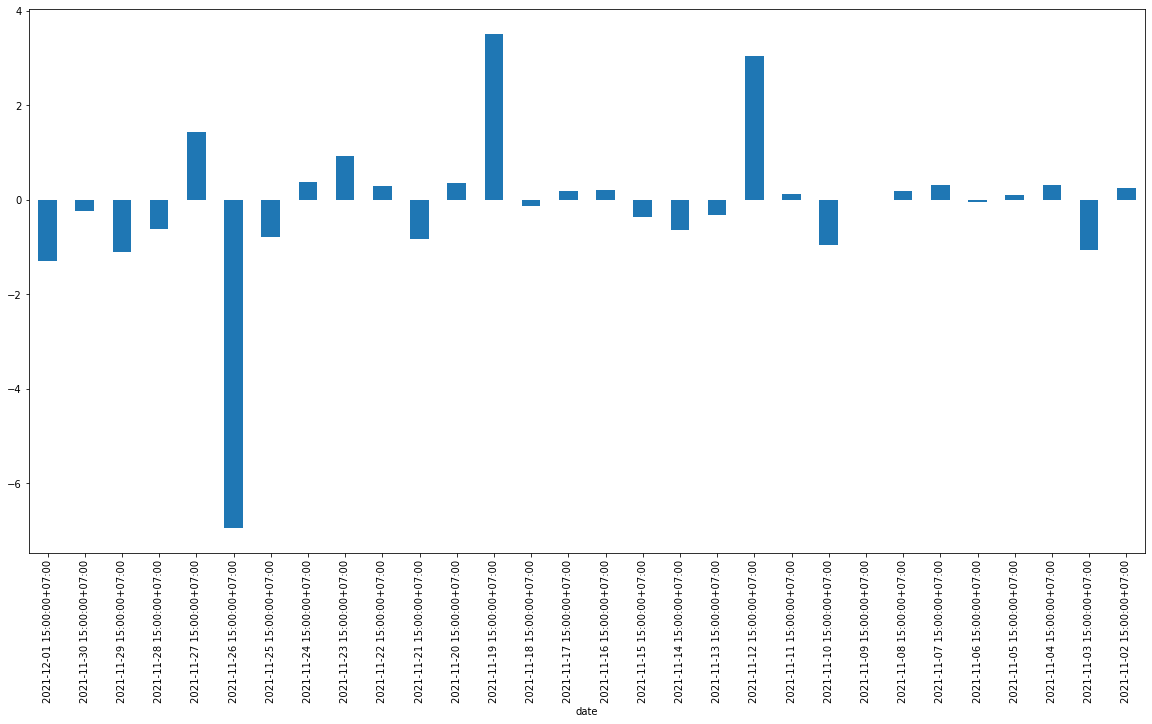

<Figure size 720x720 with 0 Axes>

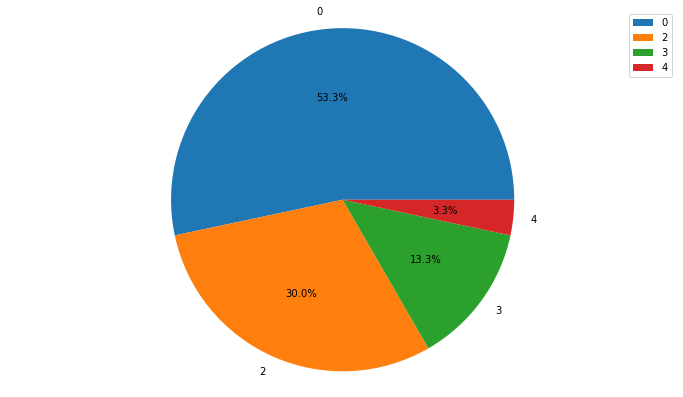

type_continuous_15
0    16
2     9
3     4
4     1
dtype: int64


In [18]:
hour_observe = 15

data_price_15 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 16
________________________________
count    17.000000
mean      0.618463
std       0.636871
min       0.039904
25%       0.268577
50%       0.370175
75%       0.611189
max       2.429150
Name: hour_return, dtype: float64
10.513865404611545
+++
count    13.000000
mean     -1.379831
std       1.301389
min      -4.628633
25%      -1.908224
50%      -0.809307
75%      -0.695825
max      -0.101420
Name: hour_return, dtype: float64
-17.937805568111358
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


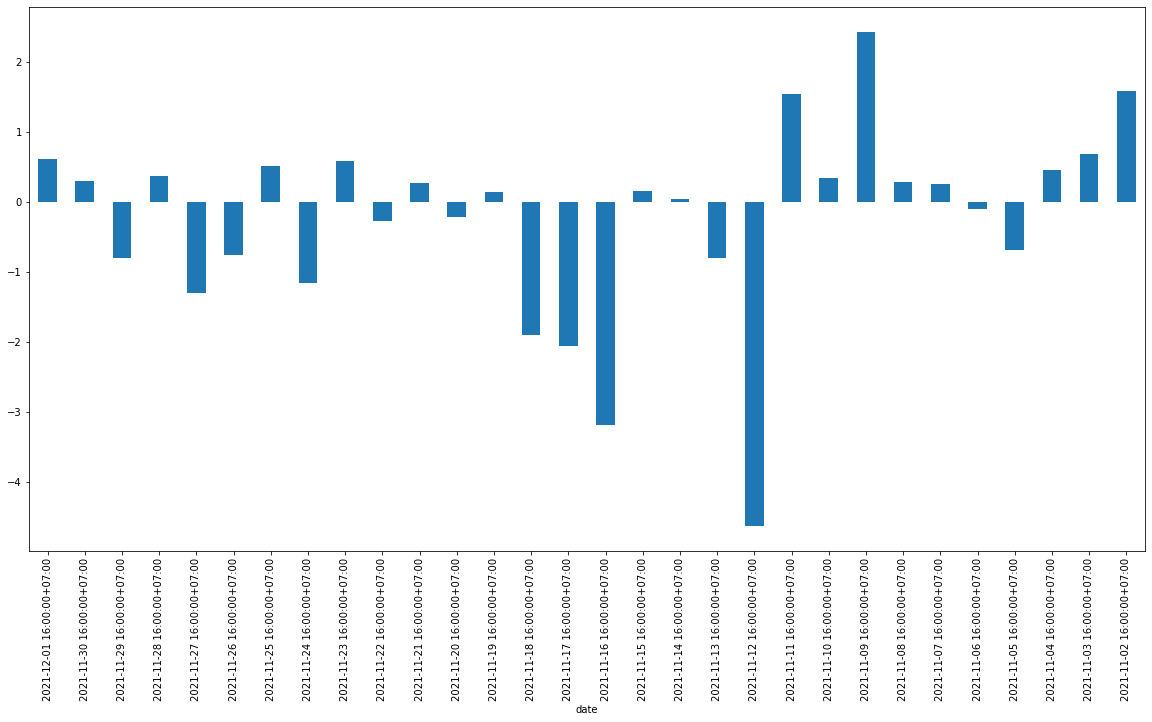

<Figure size 720x720 with 0 Axes>

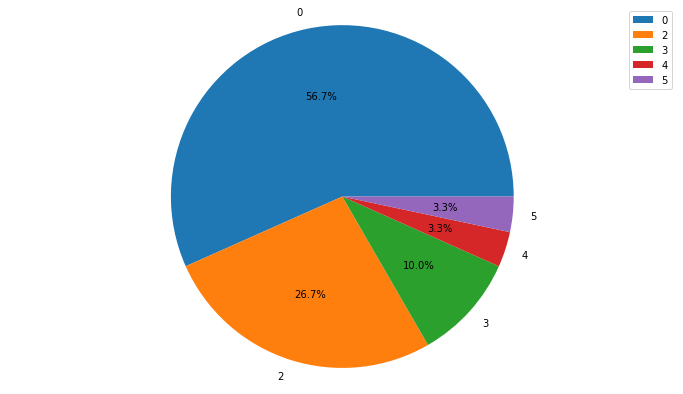

type_continuous_16
0    17
2     8
3     3
4     1
5     1
dtype: int64


In [19]:
hour_observe = 16

data_price_16 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 17
________________________________
count    17.000000
mean      1.084442
std       1.264519
min       0.050025
25%       0.370645
50%       0.650000
75%       0.898540
max       4.263207
Name: hour_return, dtype: float64
18.435521863547944
+++
count    13.000000
mean     -0.894373
std       0.598132
min      -2.256582
25%      -1.242002
50%      -0.830040
75%      -0.491071
max      -0.150678
Name: hour_return, dtype: float64
-11.6268545505447
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


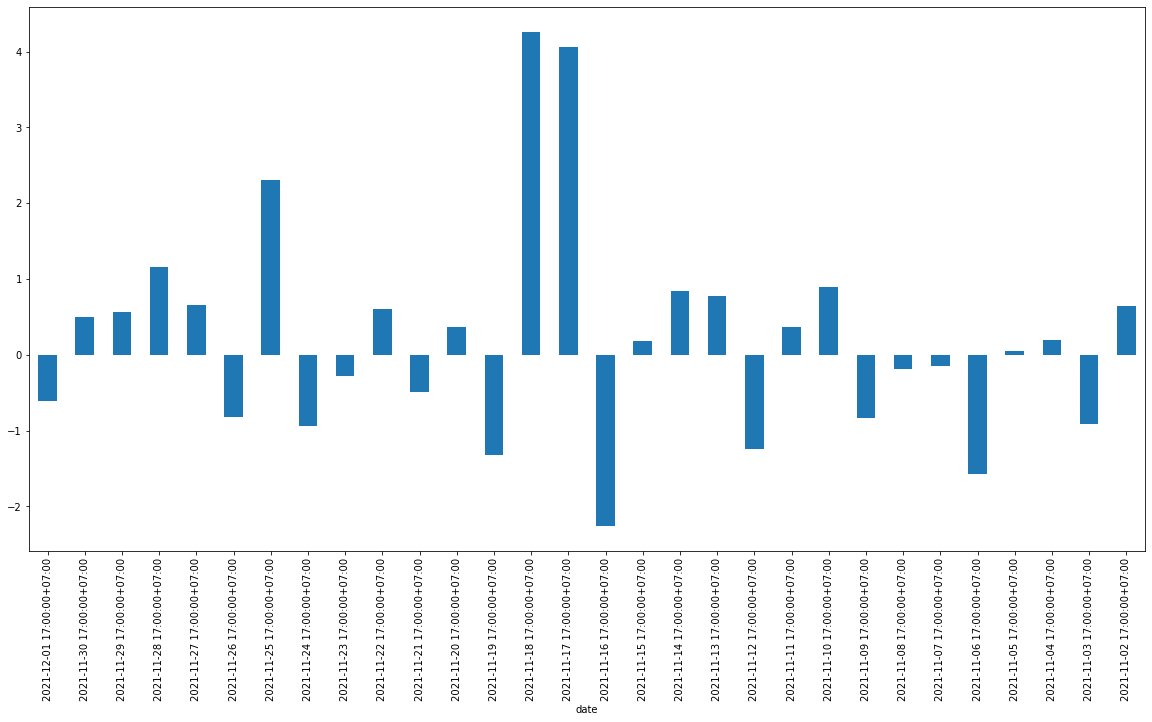

<Figure size 720x720 with 0 Axes>

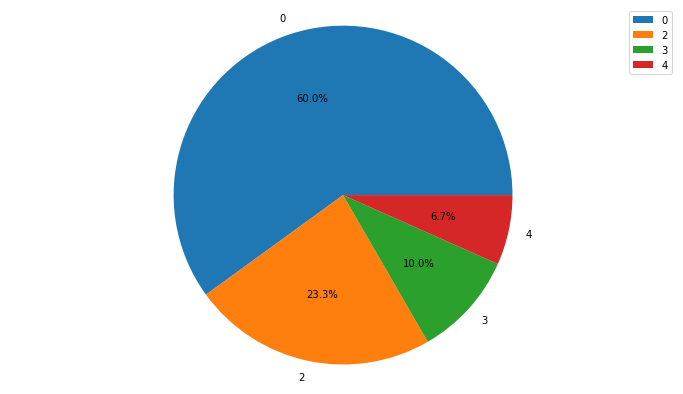

type_continuous_17
0    18
2     7
3     3
4     2
dtype: int64


In [20]:
hour_observe = 17

data_price_17 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 18
________________________________
count    11.000000
mean      1.266227
std       1.971015
min       0.100654
25%       0.373393
50%       0.476644
75%       0.931640
max       6.790353
Name: hour_return, dtype: float64
13.928501603043832
+++
count    19.000000
mean     -0.740855
std       0.721664
min      -3.111111
25%      -1.060081
50%      -0.496771
75%      -0.295985
max      -0.047687
Name: hour_return, dtype: float64
-14.076248544913023
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


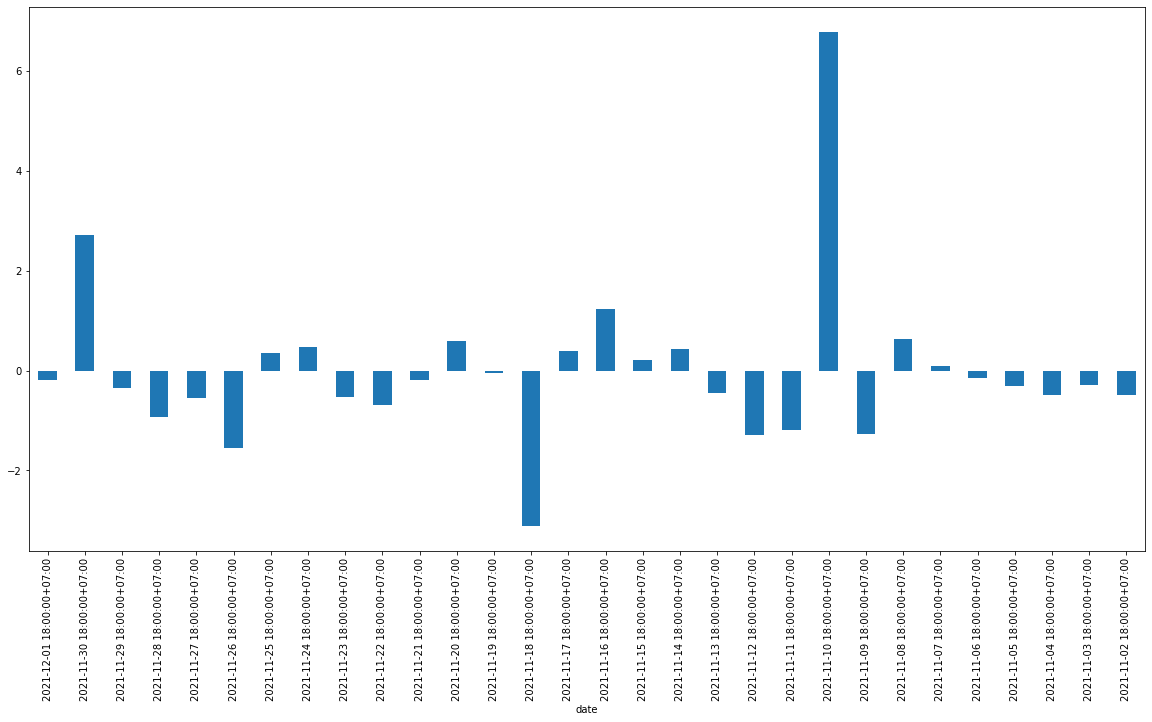

<Figure size 720x720 with 0 Axes>

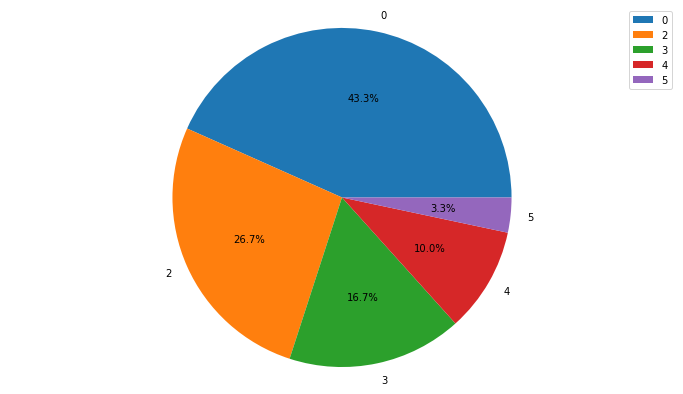

type_continuous_18
0    13
2     8
3     5
4     3
5     1
dtype: int64


In [21]:
hour_observe = 18

data_price_18 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 19
________________________________
count    16.000000
mean      0.789419
std       0.941023
min       0.094832
25%       0.226196
50%       0.435133
75%       0.734795
max       3.188145
Name: hour_return, dtype: float64
12.630699545792552
+++
count    14.000000
mean     -0.784825
std       0.706996
min      -2.292683
25%      -0.972878
50%      -0.713394
75%      -0.180763
max      -0.046620
Name: hour_return, dtype: float64
-10.98754610208319
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


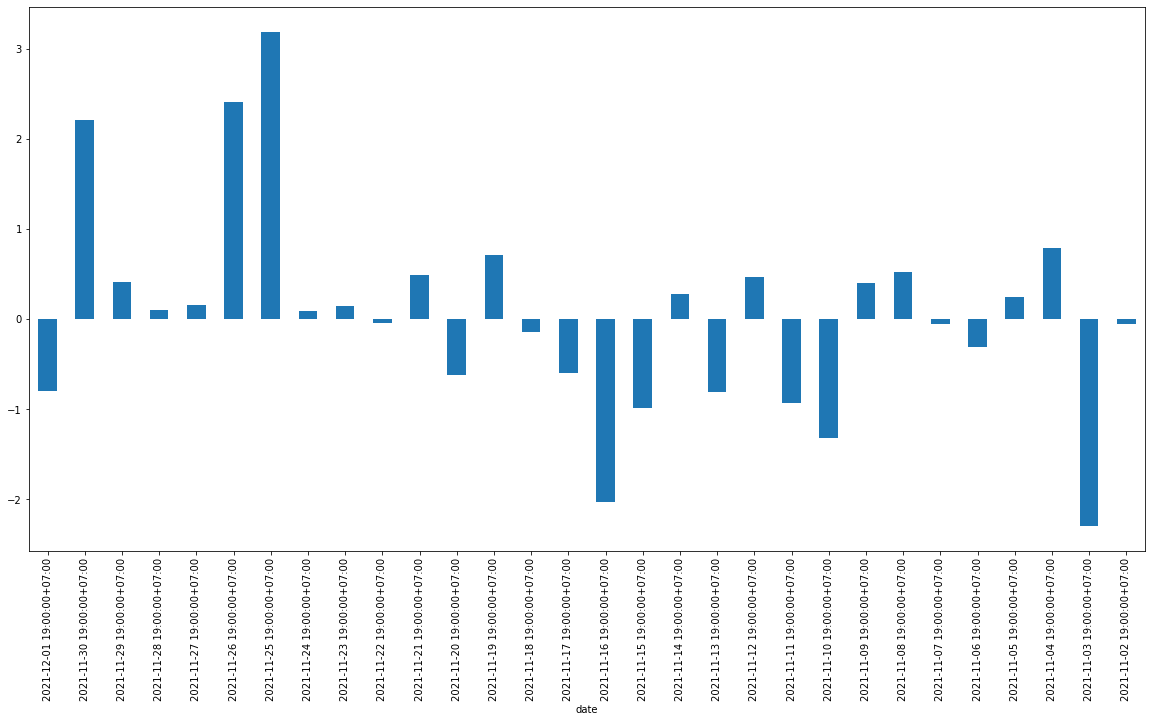

<Figure size 720x720 with 0 Axes>

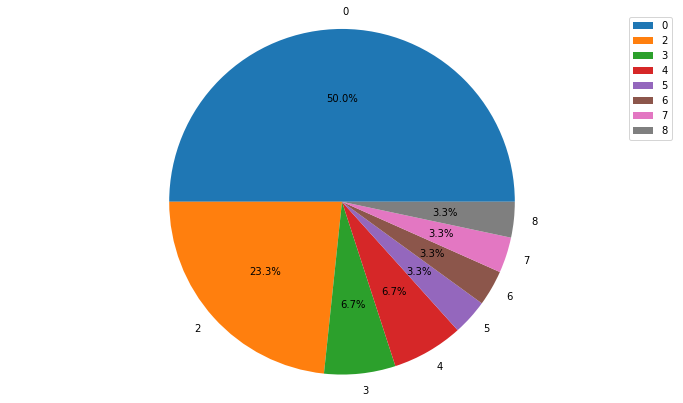

type_continuous_19
0    15
2     7
3     2
4     2
5     1
6     1
7     1
8     1
dtype: int64


In [22]:
hour_observe = 19

data_price_19 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 20
________________________________
count    18.000000
mean      1.339916
std       0.934005
min       0.152672
25%       0.537313
50%       1.328877
75%       1.889929
max       3.493976
Name: hour_return, dtype: float64
24.11849261667329
+++
count    12.000000
mean     -0.770490
std       0.375986
min      -1.279015
25%      -0.983507
50%      -0.850904
75%      -0.541543
max      -0.050302
Name: hour_return, dtype: float64
-9.245882340148626
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


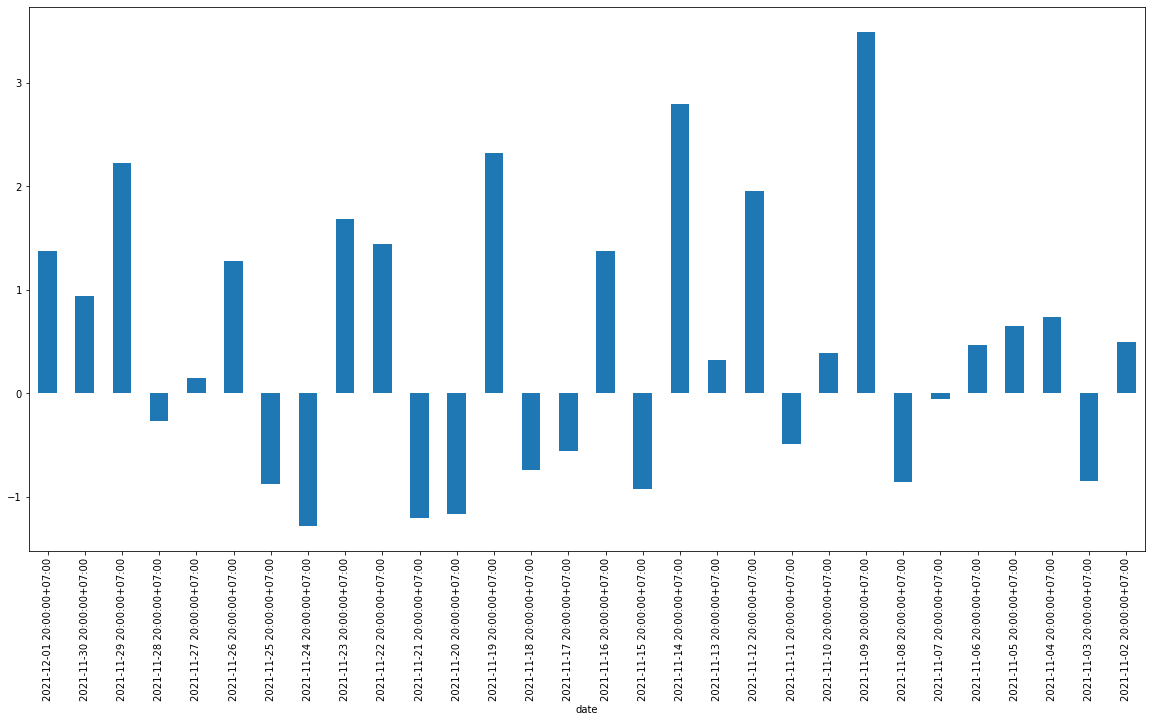

<Figure size 720x720 with 0 Axes>

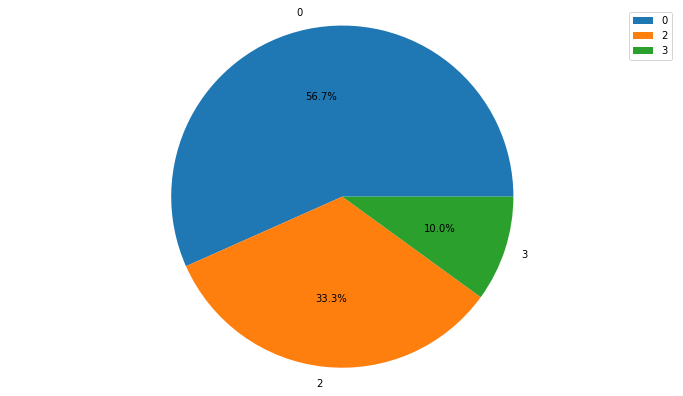

type_continuous_20
0    17
2    10
3     3
dtype: int64


In [23]:
hour_observe = 20

data_price_20 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 21
________________________________
count    16.000000
mean      1.123611
std       1.388064
min       0.045496
25%       0.222447
50%       0.642106
75%       1.344137
max       5.596107
Name: hour_return, dtype: float64
17.977768457084853
+++
count    14.000000
mean     -0.890865
std       0.628890
min      -1.960045
25%      -1.432290
50%      -0.761166
75%      -0.389534
max      -0.087796
Name: hour_return, dtype: float64
-12.47211452262756
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


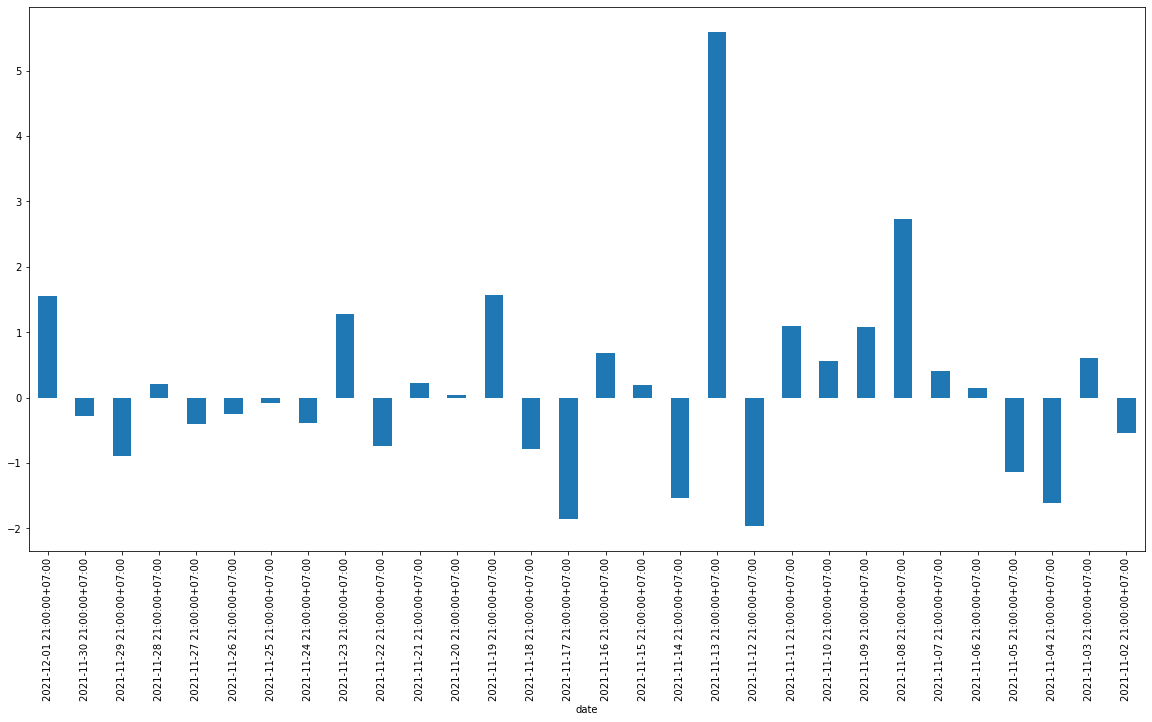

<Figure size 720x720 with 0 Axes>

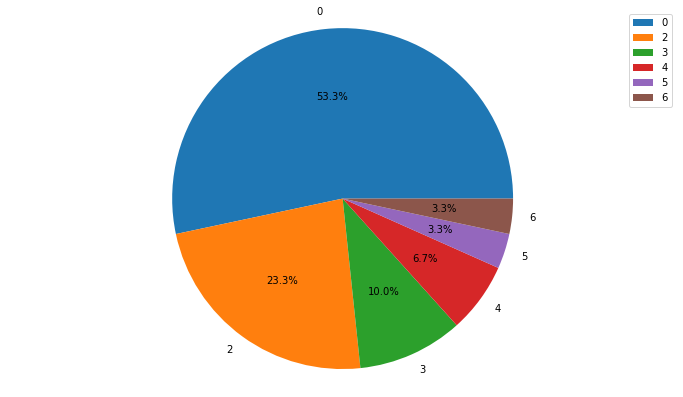

type_continuous_21
0    16
2     7
3     3
4     2
5     1
6     1
dtype: int64


In [24]:
hour_observe = 21

data_price_21 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 22
________________________________
count    12.000000
mean      0.750657
std       0.585973
min       0.150376
25%       0.282749
50%       0.529859
75%       1.129466
max       1.956218
Name: hour_return, dtype: float64
9.007880943899746
+++
count    18.000000
mean     -0.988916
std       0.858377
min      -3.343582
25%      -1.159344
50%      -0.707478
75%      -0.466180
max      -0.148644
Name: hour_return, dtype: float64
-17.80048733023299
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


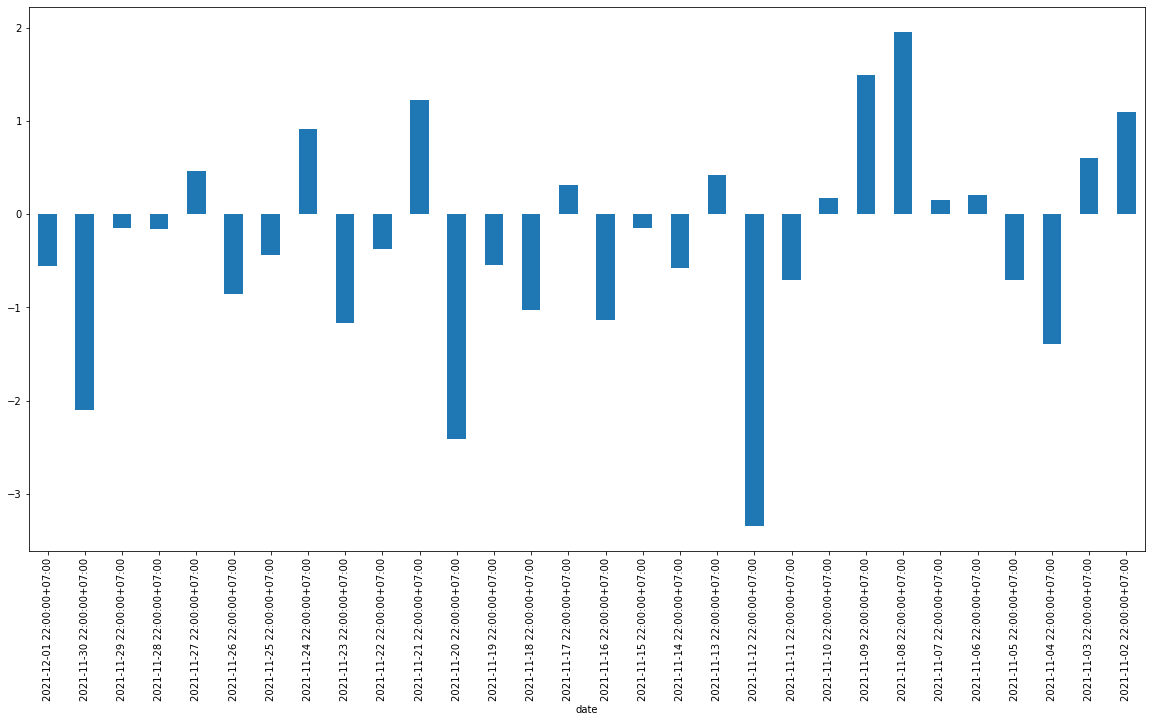

<Figure size 720x720 with 0 Axes>

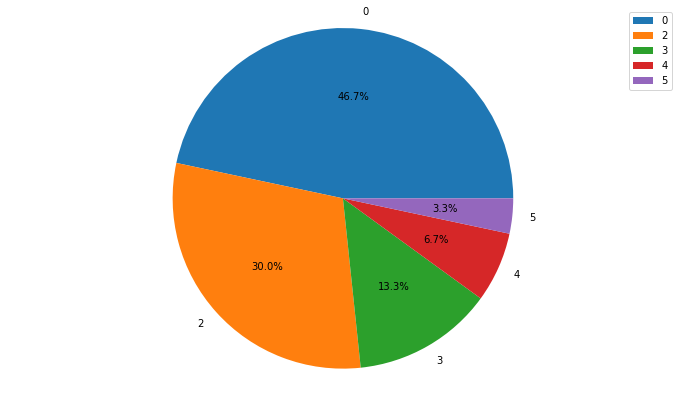

type_continuous_22
0    14
2     9
3     4
4     2
5     1
dtype: int64


In [25]:
hour_observe = 22

data_price_22 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 23
________________________________
count    17.000000
mean      0.771262
std       0.800424
min       0.000000
25%       0.151172
50%       0.472144
75%       0.981647
max       2.831050
Name: hour_return, dtype: float64
13.111447076647087
+++
count    13.000000
mean     -0.818316
std       0.712326
min      -2.781707
25%      -0.956023
50%      -0.557621
75%      -0.372301
max      -0.152517
Name: hour_return, dtype: float64
-10.638105235160479
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


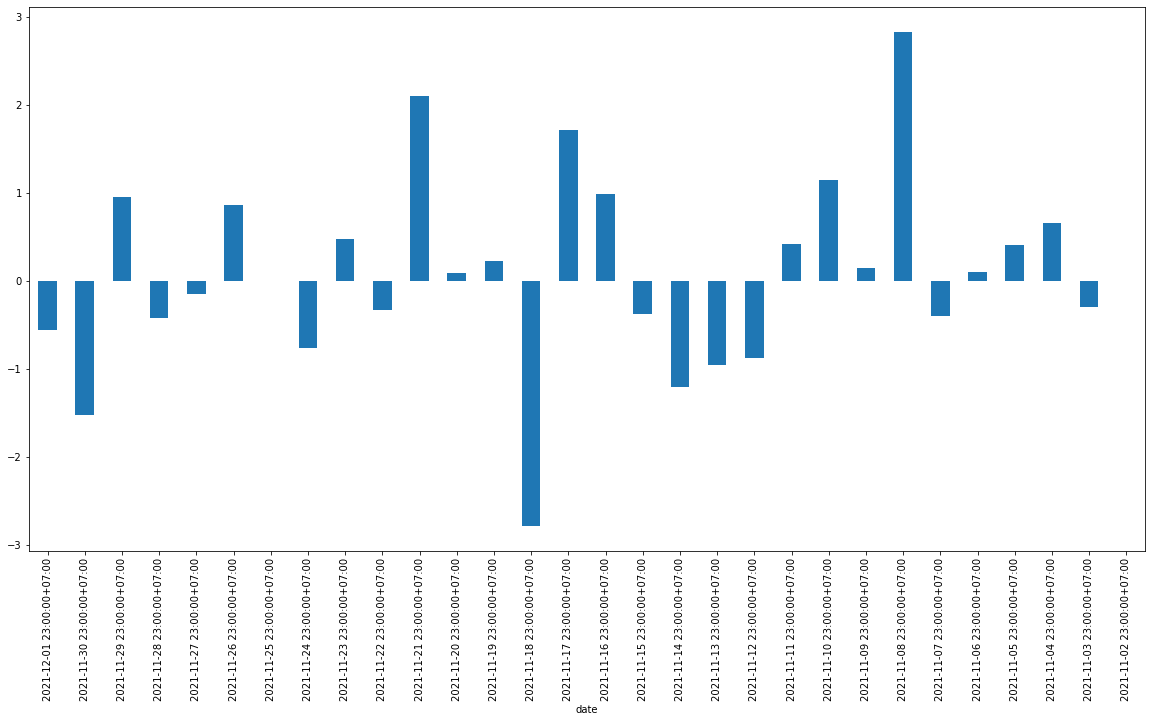

<Figure size 720x720 with 0 Axes>

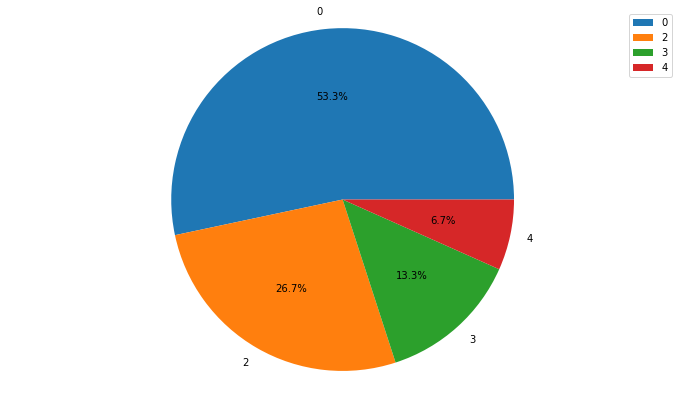

type_continuous_23
0    16
2     8
3     4
4     2
dtype: int64


In [26]:
hour_observe = 23

data_price_23 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 0
________________________________
count    12.000000
mean      1.459662
std       2.023093
min       0.080192
25%       0.278556
50%       0.504141
75%       1.913790
max       6.996047
Name: hour_return, dtype: float64
17.515939419241665
+++
count    18.000000
mean     -0.630640
std       0.487697
min      -1.916573
25%      -0.996596
50%      -0.574198
75%      -0.207078
max      -0.050201
Name: hour_return, dtype: float64
-11.35152624495431
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


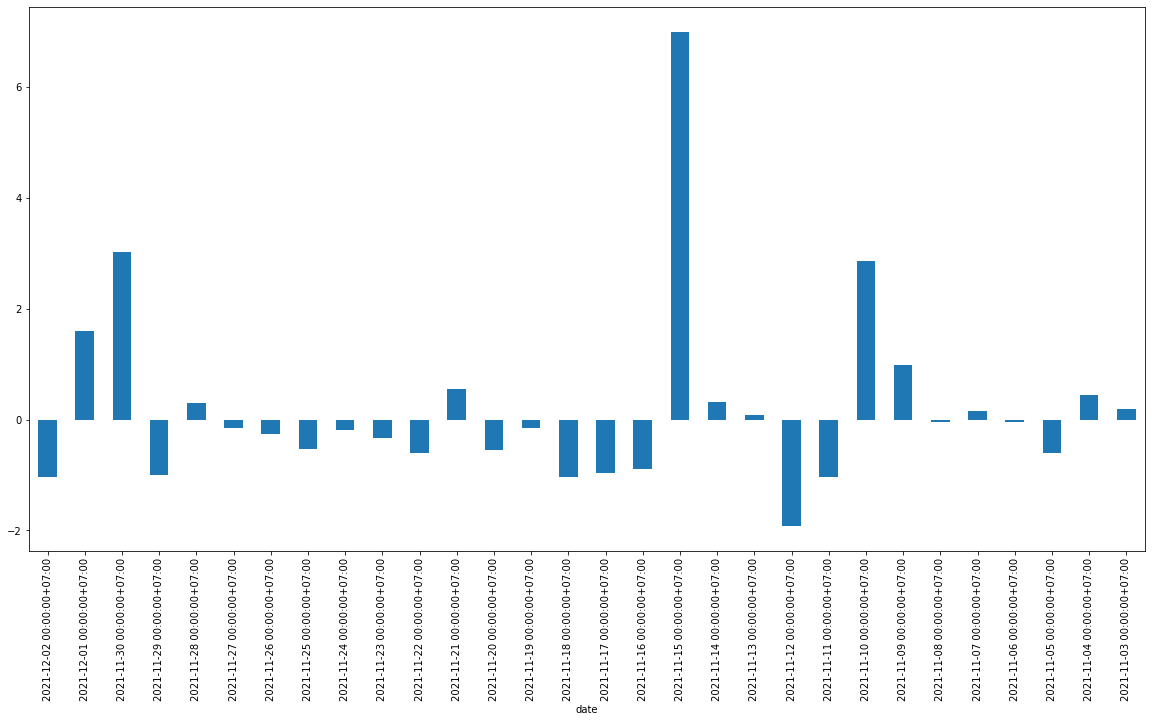

<Figure size 720x720 with 0 Axes>

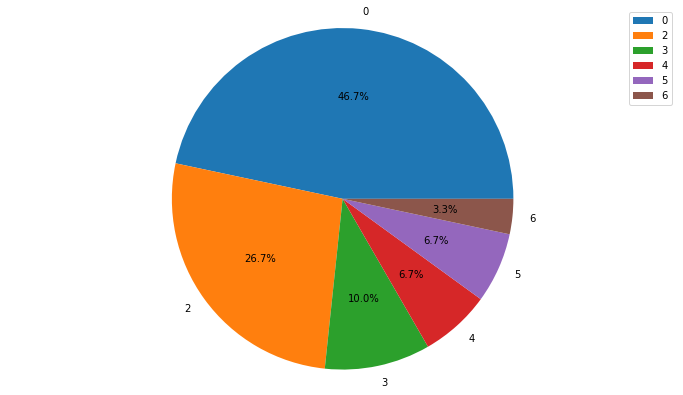

type_continuous_0
0    14
2     8
3     3
4     2
5     2
6     1
dtype: int64


In [27]:
hour_observe = 0

data_price_0 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

In [32]:
for i in range(0,24):
    x = f"data_price_{i}"
    print(x)
    exec("len(" + x + ")")

data_price_0
                            open   high  close    low    volumn  hour_return  \
date                                                                           
2021-12-02 00:00:00+07:00  214.1  214.8  211.9  211.7   20694.3    -1.027557   
2021-12-01 00:00:00+07:00  206.8  210.6  210.1  205.5   45404.5     1.595745   
2021-11-30 00:00:00+07:00  201.7  209.5  207.8  201.1  104141.0     3.024294   
2021-11-29 00:00:00+07:00  189.1  190.1  187.2  186.5   28319.6    -1.004759   
2021-11-28 00:00:00+07:00  196.4  197.5  197.0  196.0   20933.9     0.305499   
2021-11-27 00:00:00+07:00  197.6  200.0  197.3  197.1   37147.4    -0.151822   
2021-11-26 00:00:00+07:00  226.7  227.3  226.1  224.4   24076.5    -0.264667   
2021-11-25 00:00:00+07:00  207.9  209.2  206.8  206.0   20567.1    -0.529101   
2021-11-24 00:00:00+07:00  212.9  213.6  212.5  211.9   23010.1    -0.187882   
2021-11-23 00:00:00+07:00  214.7  215.0  214.0  212.6   23913.9    -0.326036   
2021-11-22 00:00:00+07:00  